In [1]:
#Import Files/Defining them
from scipy.stats import ttest_ind
import pandas as pd

df_a = pd.read_excel(r'Downloads\SampleA.xlsx')
df_b = pd.read_excel(r'Downloads\SampleB.xlsx')
df_c = pd.read_excel(r'Downloads\SampleC.xlsx')


In [2]:
#See our data just using our dataframe of sample A
df_a

,Date,PH,Temp (F),Springtails,Condition (1-3)
0,2023-02-24,NaN,70.0,NaN,NaN
1,2023-02-28,NaN,75.0,NaN,2.0
2,2023-03-09,NaN,70.0,NaN,2.0
3,2023-03-23,6.5,75.0,3.0,1.0
4,2023-03-27,7.0,76.0,0.0,1.0
5,2023-03-29,7.0,76.0,0.0,1.0
6,2023-03-01,7.0,75.0,0.0,1.0
7,2023-04-04,7.0,73.0,3.0,1.0
8,2023-04-11,6.9,75.0,0.0,1.0
9,2023-04-13,6.9,73.0,0.0,1.0


In [3]:
#Do a simple 2-Tailed T-Test of Sample A vs C
t_statistic_a_c, p_value = ttest_ind(df_a['Springtails'].dropna(), df_c['Springtails'].dropna(), equal_var=False)
t_statistic_a_c

1.185131566024762

In [4]:
#Another 2 Tailed T Test this time of B vs C
t_statistic_b_c, p_value = ttest_ind(df_c['Springtails'].dropna(), df_b['Springtails'].dropna(), equal_var=False)
t_statistic_b_c

-0.5306765646574529

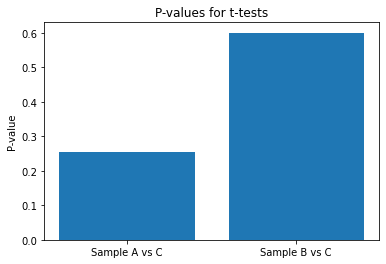

In [5]:
#Now were going to show our AvC and BvC Test in a visual form using bars
import matplotlib.pyplot as plt

# Perform the two t-tests
t_statistic_a_c, p_value_a_c = ttest_ind(df_a['Springtails'].dropna(), df_c['Springtails'].dropna(), equal_var=False)
t_statistic_b_c, p_value_b_c = ttest_ind(df_b['Springtails'].dropna(), df_c['Springtails'].dropna(), equal_var=False)

# Create a bar plot showing the p-values for the two t-tests
labels = ['Sample A vs C', 'Sample B vs C']
values = [p_value_a_c, p_value_b_c]
plt.bar(labels, values)
plt.title('P-values for t-tests')
plt.ylabel('P-value')
plt.show()

In [6]:
#Checking our Data by showing off sample B
df_b

,Date,PH,Temp (F),Springtails,Condition (1-3)
0,2023-02-24,NaN,71.0,NaN,NaN
1,2023-02-28,NaN,75.0,NaN,2.0
2,2023-03-09,NaN,70.0,NaN,2.0
3,2023-03-23,7.0,74.0,2.0,2.0
4,2023-03-27,7.1,74.0,0.0,2.0
5,2023-03-29,6.9,76.0,0.0,2.0
6,2023-03-31,7.0,75.0,0.0,2.0
7,2023-04-04,6.9,72.0,0.0,2.0
8,2023-04-11,6.5,73.0,0.0,1.0
9,2023-04-13,6.8,73.0,0.0,1.0


In [7]:
#Also looking at our data this time sample C
df_c

,Date,PH,Temp (F),Springtails,Condition (1-3)
0,2023-02-24,NaN,71.0,NaN,NaN
1,2023-02-28,NaN,74.0,NaN,2.0
2,2023-03-09,NaN,71.0,NaN,2.0
3,2023-03-23,7.1,75.0,2.0,2.0
4,2023-03-27,7.0,74.0,0.0,2.0
5,2023-03-29,7.0,76.0,0.0,2.0
6,2023-03-31,7.0,75.0,0.0,2.0
7,2023-04-04,7.0,73.0,2.0,2.0
8,2023-04-11,6.9,76.0,0.0,2.0
9,2023-04-13,7.0,70.0,0.0,2.0


In [8]:
#Getting a oneway test set up for ANOVA testing
from scipy.stats import f_oneway

# Extract the relevant columns for each treatment group
group_a = df_a['Springtails'].dropna()
group_b = df_b['Springtails'].dropna()
group_c = df_c['Springtails'].dropna()

# Perform ANOVA test
f_statistic, p_value = f_oneway(group_a, group_b, group_c)

# Print the results
print("F-Statistic: {:.2f}".format(f_statistic))
print("P-value: {:.4f}".format(p_value))

F-Statistic: 0.90
P-value: 0.4160


In [9]:
#Degrees of freedom A vs C
DF_a_c = 17+16-2
DF_a_c

31

In [10]:
#Calling our T Statistic for A vs C from ealier to compare on a table with our Degrees of Freedom
t_statistic_a_c

1.185131566024762

In [11]:
#Degrees of freedom B vs C
DF_b_c = 17+16-2
DF_b_c

31

In [12]:
#Calling our T Statistic for B vs C from ealier to compare on a table with our Degrees of Freedom
t_statistic_b_c

0.5306765646574529

In [13]:
df_b_nona = df_b.dropna()
df_c_nona = df_c.dropna()

In [14]:
t_statistic_bna_c, p_value = ttest_ind(df_c_nona['Springtails'], df_b_nona['Springtails'], equal_var=False)
t_statistic_bna_c

-0.17161286559962932